In [176]:
import pandas as pd
import seaborn as sns
import os



El presente documento principalmente busca analizar, transformar y consolidar las 3 bases de datos en una única base de datos, la cual se generará en un archivo excel para dar respuesta a las problemáticas generadas en Power bi.

Con base en lo anterior, se verificará si este archivo existe o no actualizarlo con base en las transformaciones requeridas a los datos.

In [177]:
ruta_archivo = 'C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\BDC_Data_Analytics.xlsx'

if os.path.isfile(ruta_archivo):
    
    os.remove(ruta_archivo)
    print('Archivo eliminado con éxito.')
else:
    print('El archivo no existe.')

El archivo no existe.


- Portal de datos abiertos, conjunto de datos SECOP I - Procesos de Compra Pública

- Se abre un archivo csv llamado Data_analytics_SECOP_1.csv con la información contractual de SECOP I desde el 1° de enero de 2023 a la fecha. 
- Se estandarizan las columnas de modo que todas sean en mayúsculas y sin espacios externos
- Se verifica el tamaño del set

In [178]:
df_s1_inicial=pd.read_csv('C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\Data_analytics_SECOP_1.csv')

cols=list(df_s1_inicial.columns)
cols=[x.upper().strip() for x in cols]
df_s1_inicial.columns=cols

print(cols)

df_s1_inicial.shape

C:\Windows\Temp\ipykernel_16428\1618291602.py:1: DtypeWarning: Columns (28,30,34,38,54) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s1_inicial=pd.read_csv('C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\Data_analytics_SECOP_1.csv')


['UID', 'ANNO CARGUE SECOP', 'ANNO FIRMA CONTRATO', 'NIVEL ENTIDAD', 'ORDEN ENTIDAD', 'NOMBRE ENTIDAD', 'NIT DE LA ENTIDAD', 'CÓDIGO DE LA ENTIDAD', 'ID MODALIDAD', 'MODALIDAD DE CONTRATACION', 'ESTADO DEL PROCESO', 'CAUSAL DE OTRAS FORMAS DE CONTRATACION DIRECTA', 'ID REGIMEN DE CONTRATACION', 'NOMBRE REGIMEN DE CONTRATACION', 'ID OBJETO A CONTRATAR', 'OBJETO A CONTRATAR', 'DETALLE DEL OBJETO A CONTRATAR', 'TIPO DE CONTRATO', 'MUNICIPIO DE OBTENCION', 'MUNICIPIO DE ENTREGA', 'MUNICIPIOS EJECUCION', 'FECHA DE CARGUE EN EL SECOP', 'NUMERO DE CONSTANCIA', 'NUMERO DE PROCESO', 'NUMERO DE CONTRATO', 'CUANTIA PROCESO', 'ID GRUPO', 'NOMBRE GRUPO', 'ID FAMILIA', 'NOMBRE FAMILIA', 'ID CLASE', 'NOMBRE CLASE', 'ID ADJUDICACION', 'TIPO IDENTIFI DEL CONTRATISTA', 'IDENTIFICACION DEL CONTRATISTA', 'NOM RAZON SOCIAL CONTRATISTA', 'DPTO Y MUNI CONTRATISTA', 'TIPO DOC REPRESENTANTE LEGAL', 'IDENTIFIC REPRESENTANTE LEGAL', 'NOMBRE DEL REPRESEN LEGAL', 'FECHA DE FIRMA DEL CONTRATO', 'FECHA INI EJEC CONT

(344002, 72)

In [179]:
df_s1=df_s1_inicial

df_s1.shape

(344002, 72)

In [180]:
df_s1['ESTADO DEL PROCESO'].unique()

array(['Liquidado', 'Celebrado', 'Terminado sin Liquidar', 'Convocado',
       'Adjudicado'], dtype=object)

Ahora verificamos cómo es la distribución por cantidad de contratos para los estados de contrato de mayor a menor 

In [181]:
estado_proceso_agrupados = pd.DataFrame(df_s1.groupby('ESTADO DEL PROCESO')['NUMERO DE CONTRATO'].count()).sort_values('NUMERO DE CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['NUMERO DE CONTRATO'] / x['NUMERO DE CONTRATO'].sum()) * 100)

estado_proceso_agrupados

,NUMERO DE CONTRATO,Porcentaje_de_Participacion
ESTADO DEL PROCESO,,
Celebrado,232895,67.704003
Liquidado,100673,29.266258
Terminado sin Liquidar,10331,3.003285
Convocado,90,0.026164
Adjudicado,1,0.000291


Vemos que hay 90 contratos con un estado del proceso como convocado, necesitamos únicamente contratos firmados, celebrados o liquidados, por lo cual eliminaremos estos datos de la base de datos

In [182]:
print(f'Tamaño del set antes de eliminar los estados de proceso que no nos sirven para el análisis: {df_s1.shape} ')
df_s1 = df_s1[~(df_s1['ESTADO DEL PROCESO'] == 'Convocado')]
print(f'Tamaño del set después de eliminar los estados de proceso que no nos sirven para el análisis: {df_s1.shape} ')

Tamaño del set antes de eliminar los estados de proceso que no nos sirven para el análisis: (344002, 72) 


KeyboardInterrupt: 

Ahora la distribución en cantidad de contratos para las modalidades de contratación 

In [ ]:
df_s1['MODALIDAD DE CONTRATACION'].unique()

array(['Contratos y convenios con más de dos partes',
       'Contratación Directa (Ley 1150 de 2007)', 'Régimen Especial',
       'Selección Abreviada servicios de Salud',
       'Contratación Mínima Cuantía',
       'Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)',
       'Licitación obra pública', 'Concurso de Méritos Abierto',
       'Licitación Pública', 'Subasta', 'Asociación Público Privada',
       'Concurso de Méritos con Lista Corta',
       'Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007',
       'Concurso de diseño Arquitectónico',
       'Otras Formas de Contratación Directa'], dtype=object)

In [ ]:
modalidad_s1_agrupados = pd.DataFrame(df_s1.groupby('MODALIDAD DE CONTRATACION')['NUMERO DE CONTRATO'].count()).sort_values('NUMERO DE CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['NUMERO DE CONTRATO'] / x['NUMERO DE CONTRATO'].sum()) * 100)

modalidad_s1_agrupados

,NUMERO DE CONTRATO,Porcentaje_de_Participacion
MODALIDAD DE CONTRATACION,,
Contratación Directa (Ley 1150 de 2007),222675,64.749927
Contratación Mínima Cuantía,51343,14.929631
Régimen Especial,35536,10.333236
Contratos y convenios con más de dos partes,16847,4.898808
Selección Abreviada de Menor Cuantía (Ley 1150 de 2007),7989,2.323059
Subasta,3155,0.917418
Concurso de Méritos Abierto,2690,0.782204
Licitación obra pública,2189,0.636522
Licitación Pública,1281,0.372492


Al hacer esta verificación se puede evidenciar que diferentes modalidades se podrían agrupar en categorías para facilidad de análisis, 

(i) La categorías de 'Contratación Directa (Ley 1150 de 2007)' y 'Otras Formas de Contratación Directa' se dejarán como 'Contratación Directa'. 

(ii) Las diferentes selecciones abreviadas y la subasta y las agruparemos en una gran categoría llamada "Selección Abreviada". 

(iii) Agruparemos los diferentes concursos de méritos en una sóla categoría llamada "Concurso de Méritos".

(iv) Unificaremos la licitación obra pública junto con la licitación pública y la dejaremos como una única categoría de licitación pública.

Sin embargo, no dejaremos perder la columna original con las modalidades de contratación, por lo cual crearemos una nueva llamada "MODALIDAD GENERAL"

In [ ]:
df_s1['MODALIDAD GENERAL']=df_s1['MODALIDAD DE CONTRATACION']

C:\Windows\Temp\ipykernel_16428\3838184372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1['MODALIDAD GENERAL']=df_s1['MODALIDAD DE CONTRATACION']


In [ ]:
reemplazos_modalidad_s1 = {'Contratación Directa (Ley 1150 de 2007)': 'Contratación Directa',
    'Otras Formas de Contratación Directa':'Contratación Directa',
    'Selección Abreviada de Menor Cuantía (Ley 1150 de 2007)': 'Selección Abreviada',
    'Selección Abreviada del literal h del numeral 2 del artículo 2 de la Ley 1150 de 2007': 'Selección Abreviada',
    'Subasta': 'Selección Abreviada', 'Selección Abreviada servicios de Salud': 'Selección Abreviada',
    'Concurso de Méritos Abierto':'Concurso de Méritos' , 'Concurso de Méritos con Lista Corta':'Concurso de Méritos',
    'Licitación obra pública':'Licitación Pública'
}

df_s1['MODALIDAD GENERAL'].replace(reemplazos_modalidad_s1, inplace=True)


C:\Windows\Temp\ipykernel_16428\4008672994.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_s1['MODALIDAD GENERAL'].replace(reemplazos_modalidad_s1, inplace=True)
C:\Windows\Temp\ipykernel_16428\4008672994.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1['MODALIDAD GENERAL'].replace(reemplazos_modalidad_s1, inplace=True)


Verificamos los reemplazos realizados

In [ ]:
df_s1['MODALIDAD GENERAL'].unique()

array(['Contratos y convenios con más de dos partes',
       'Contratación Directa', 'Régimen Especial', 'Selección Abreviada',
       'Contratación Mínima Cuantía', 'Licitación Pública',
       'Concurso de Méritos', 'Asociación Público Privada',
       'Concurso de diseño Arquitectónico'], dtype=object)

Ahora verificamos los tipos de contrato que tenemos en la base de datos

In [ ]:
df_s1['TIPO DE CONTRATO'].unique()

array(['Prestación de Servicios', 'Suministro', 'Consultoría',
       'Otro Tipo de Contrato', 'Arrendamiento', 'Obra', 'Compraventa',
       'Agregación de Demanda', 'Interventoría', 'Comodato', 'Fiducia',
       'No Definido', 'Acuerdo Marco', 'Crédito', 'Concesión'],
      dtype=object)

Verificamos la distribución de los tipos de contrato

In [ ]:
tipo_contrato_s1_agrupados = pd.DataFrame(df_s1.groupby('TIPO DE CONTRATO')['NUMERO DE CONTRATO'].count()).sort_values('NUMERO DE CONTRATO', ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['NUMERO DE CONTRATO'] / x['NUMERO DE CONTRATO'].sum()) * 100)

tipo_contrato_s1_agrupados

,NUMERO DE CONTRATO,Porcentaje_de_Participacion
TIPO DE CONTRATO,,
Prestación de Servicios,264956,77.044490
Suministro,29380,8.543181
Otro Tipo de Contrato,17141,4.984298
Obra,13576,3.947659
Compraventa,9954,2.894446
Interventoría,3029,0.880779
Arrendamiento,2566,0.746147
Consultoría,2534,0.736842
Comodato,382,0.111079


Para el presente ejercicio vamos a considerar la totalidad de los tipos de contrato, la única categoría que debe estudiarse a detalle es la de "No definido", debido a que puede ser cualquiera de las demás categorías, esto se verifica de manera manual para cada objeto contractual.

Es importante que la base de datos no cuente con información imprecisa, algunos contratos puede que aùn en un estado activo pueda que no tengan un proveedor adjudicado, por lo cual se debe verificar esto ya que requerimos informaciòn de los proveedores o contratistas para nuestro problema a resolver. 

Inicialmente, debemos revisar el tipo de datos para la columna 'NOM RAZON SOCIAL CONTRATISTA'

In [ ]:
tipo_dato = df_s1['NOM RAZON SOCIAL CONTRATISTA'].dtype
print("Tipo de dato:", tipo_dato)

Tipo de dato: object


A continuación, se verificará si algún contrato no tiene un contratista adjudicado, debemos eliminarlo de la base de datos, pero se debe pasar primero a cadena de texto

In [ ]:
# Convertir la columna 'NOM RAZON SOCIAL CONTRATISTA' a cadena (str)
df_s1['NOM RAZON SOCIAL CONTRATISTA'] = df_s1['NOM RAZON SOCIAL CONTRATISTA'].astype(str)

# Verificar si hay valores vacíos en la columna 'NOM RAZON SOCIAL CONTRATISTA'
valores_vacios = df_s1[df_s1['NOM RAZON SOCIAL CONTRATISTA'] == '']
print("Valores vacíos:", valores_vacios)

Valores vacíos: Empty DataFrame
Columns: [UID, ANNO CARGUE SECOP, ANNO FIRMA CONTRATO, NIVEL ENTIDAD, ORDEN ENTIDAD, NOMBRE ENTIDAD, NIT DE LA ENTIDAD, CÓDIGO DE LA ENTIDAD, ID MODALIDAD, MODALIDAD DE CONTRATACION, ESTADO DEL PROCESO, CAUSAL DE OTRAS FORMAS DE CONTRATACION DIRECTA, ID REGIMEN DE CONTRATACION, NOMBRE REGIMEN DE CONTRATACION, ID OBJETO A CONTRATAR, OBJETO A CONTRATAR, DETALLE DEL OBJETO A CONTRATAR, TIPO DE CONTRATO, MUNICIPIO DE OBTENCION, MUNICIPIO DE ENTREGA, MUNICIPIOS EJECUCION, FECHA DE CARGUE EN EL SECOP, NUMERO DE CONSTANCIA, NUMERO DE PROCESO, NUMERO DE CONTRATO, CUANTIA PROCESO, ID GRUPO, NOMBRE GRUPO, ID FAMILIA, NOMBRE FAMILIA, ID CLASE, NOMBRE CLASE, ID ADJUDICACION, TIPO IDENTIFI DEL CONTRATISTA, IDENTIFICACION DEL CONTRATISTA, NOM RAZON SOCIAL CONTRATISTA, DPTO Y MUNI CONTRATISTA, TIPO DOC REPRESENTANTE LEGAL, IDENTIFIC REPRESENTANTE LEGAL, NOMBRE DEL REPRESEN LEGAL, FECHA DE FIRMA DEL CONTRATO, FECHA INI EJEC CONTRATO, PLAZO DE EJEC DEL CONTRATO, RANGO DE

C:\Windows\Temp\ipykernel_16428\2311081096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1['NOM RAZON SOCIAL CONTRATISTA'] = df_s1['NOM RAZON SOCIAL CONTRATISTA'].astype(str)


Ahora vamos a revisar las fechas de firma de los contratos, es necesario que las fechas de los tres conjuntos de datos que integraremos se encuentren en el mismo formato, por lo cual definiremos esto para cada uno de ellos mediante la función pd.to.datetime para los datos de fecha que nos puedan interesar. En este caso se modifica la columna "FECHA DE FIRMA DEL CONTRATO".

In [ ]:
df_s1['FECHA DE FIRMA DEL CONTRATO'].head()

0    01/01/2023
1    01/01/2023
2    01/01/2023
3    01/01/2023
4    01/01/2023
Name: FECHA DE FIRMA DEL CONTRATO, dtype: object

Vemos a continuación que el formato de fecha se presenta de la siguiente forma  "dd/mm/yyyy", mientras que pd.to_datetime() asume el formato por defecto "mm/dd/yyyy". Por lo cual se debe ajustar la función con este criterio

In [ ]:
print(f'Formato de fecha de firma del contrato inicial: {df_s1['FECHA DE FIRMA DEL CONTRATO'].dtype}')
df_s1['FECHA DE FIRMA DEL CONTRATO'] = pd.to_datetime(df_s1['FECHA DE FIRMA DEL CONTRATO'], format='%d/%m/%Y')
print(f'Formato de fecha de firma del contrato después del cambio de formato: {df_s1['FECHA DE FIRMA DEL CONTRATO'].dtype}')

Formato de fecha de firma del contrato inicial: object
Formato de fecha de firma del contrato después del cambio de formato: datetime64[ns]


C:\Windows\Temp\ipykernel_16428\2108634684.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1['FECHA DE FIRMA DEL CONTRATO'] = pd.to_datetime(df_s1['FECHA DE FIRMA DEL CONTRATO'], format='%d/%m/%Y')


In [ ]:
df_s1['FECHA DE FIRMA DEL CONTRATO'].head()

0   2023-01-01
1   2023-01-01
2   2023-01-01
3   2023-01-01
4   2023-01-01
Name: FECHA DE FIRMA DEL CONTRATO, dtype: datetime64[ns]

Ahora, por algunos aspectos de la paltaforma es probable que algunos contratos se dupliquen en la base de datos inicial, por lo cual debemos eliminar todos los contratos duplicados para evitar inconsistencias en nuestro análisis. Tendremos la columna 'NUMERO DE CONTRATO' para verificar los datos duplicados. Este paso prefereiblemente se debe realizar al principio, ya que algunas depuraciones o transformaciones que se hicieron inicialmente a la base de datos no las hubieramos tenido que hacer al eliminar valores duplicados. 

Es importante aclarar que los nùmeros de contrato pueden ser iguales para distintas entidades estatales, por ejemplo, una entidad estatal puede generar el contrato de prestación de servicios CPS-001-2023, por lo cual si eliminamos los repetidos, nos puede eliminar contratos reales de otras entidades y nos sesgan el análsiis. Necesitamos entonces generar un identificador por entidad para cada contrato, concatenando las columnas del nombre de la entidad con el número de contrato registrado.

In [ ]:
df_s1['NUMERO DE CONTRATO UNICO'] = df_s1['NOMBRE ENTIDAD'] + df_s1['NUMERO DE CONTRATO']

C:\Windows\Temp\ipykernel_16428\3305492955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1['NUMERO DE CONTRATO UNICO'] = df_s1['NOMBRE ENTIDAD'] + df_s1['NUMERO DE CONTRATO']


Ahora podremos eliminar los numeros de contrato duplicados con base en la nueva columna 'NUMERO DE CONTRATO UNICO' 

In [ ]:
print(f'Tamaño del set antes de eliminar los contratos Repetidos: {df_s1.shape} ')
df_s1.drop_duplicates(subset='NUMERO DE CONTRATO UNICO', keep='first', inplace=True)
print(f'Tamaño del set después de eliminar los contratos Repetidos: {df_s1.shape}')

Tamaño del set antes de eliminar los contratos Repetidos: (343912, 74) 
Tamaño del set después de eliminar los contratos Repetidos: (335205, 74)


C:\Windows\Temp\ipykernel_16428\264520543.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s1.drop_duplicates(subset='NUMERO DE CONTRATO UNICO', keep='first', inplace=True)


En cuanto al valor de los contratos, se debe revisar si alguna entidad ha cometido alguna impresición en el valor del contrato registrado, por lo cual debemos revisar en un diagrama de caja (boxplot), y sirve para visualizar la distribución de un conjunto de datos numéricos y para identificar la presencia de valores atípicos

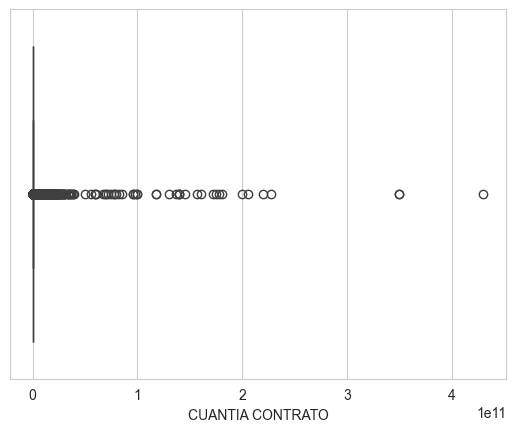

In [ ]:
plot= sns.set_style("whitegrid")
ax=sns.boxplot(x=df_s1['CUANTIA CONTRATO'])
plot

Identificamos una concentración mayoritariamente entre 0 y 100 mil millones de pesos para el valor de los contratos, debemos verificar los valores que no estén dentro de este rango para cerciorarnos que las cifras no presentan inconsistencias

In [ ]:
df_s1_out=df_s1[df_s1['CUANTIA CONTRATO']>=100000000000]

df_s1_out.shape

(22, 74)

Se pueden identificar entonces 22 contratos que presentan valores de contratos atípicos, por lo cual debemos revisar directamente de la fuente de datos si realmente ese es el valor. 

In [ ]:
df_s1_out['RUTA PROCESO EN SECOP I']

110       https://www.contratos.gov.co/consultas/detalle...
309       https://www.contratos.gov.co/consultas/detalle...
351       https://www.contratos.gov.co/consultas/detalle...
921       https://www.contratos.gov.co/consultas/detalle...
60989     https://www.contratos.gov.co/consultas/detalle...
86047     https://www.contratos.gov.co/consultas/detalle...
124644    https://www.contratos.gov.co/consultas/detalle...
161026    https://www.contratos.gov.co/consultas/detalle...
182513    https://www.contratos.gov.co/consultas/detalle...
205063    https://www.contratos.gov.co/consultas/detalle...
244824    https://www.contratos.gov.co/consultas/detalle...
259552    https://www.contratos.gov.co/consultas/detalle...
274645    https://www.contratos.gov.co/consultas/detalle...
297118    https://www.contratos.gov.co/consultas/detalle...
335303    https://www.contratos.gov.co/consultas/detalle...
343955    https://www.contratos.gov.co/consultas/detalle...
343956    https://www.contratos.gov.co/c

Una vez revisados, se identfica que no son errores, por lo cual podemos continuar con el análisis.

Finalmente, seleccionaremos las columnas que identificamos para unificar una base de datos consolidada junto con SECOP 2 y TVEC

In [ ]:
df_s1_integrar=df_s1[['NOMBRE ENTIDAD' ,'MUNICIPIO ENTIDAD', 'ESTADO DEL PROCESO', 'NUMERO DE PROCESO','NUMERO DE CONTRATO UNICO','NUMERO DE CONTRATO', 'DETALLE DEL OBJETO A CONTRATAR', 'FECHA DE FIRMA DEL CONTRATO', 'IDENTIFICACION DEL CONTRATISTA', 'NOM RAZON SOCIAL CONTRATISTA', 'CUANTIA CONTRATO', 'MODALIDAD GENERAL','TIPO DE CONTRATO','RUTA PROCESO EN SECOP I']]

- Portal de datos abiertos, conjunto de datos SECOP II - Contratos Electrónicos

Se abre un archivo csv llamado Data_analytics_SECOP_2.csv con la información contractual desde el 1° de enero de 2023 a la fecha. 

In [ ]:
df_s2_inicial=pd.read_csv('C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\Data_analytics_SECOP_2.csv')

cols=list(df_s2_inicial.columns)
cols=[x.upper().strip() for x in cols]
df_s2_inicial.columns=cols

print(cols)

df_s2_inicial.shape

C:\Windows\Temp\ipykernel_16428\2739464640.py:1: DtypeWarning: Columns (21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s2_inicial=pd.read_csv('C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\Data_analytics_SECOP_2.csv')


['NOMBRE ENTIDAD', 'NIT ENTIDAD', 'DEPARTAMENTO', 'CIUDAD', 'LOCALIZACIÓN', 'ORDEN', 'SECTOR', 'RAMA', 'ENTIDAD CENTRALIZADA', 'PROCESO DE COMPRA', 'ID CONTRATO', 'REFERENCIA DEL CONTRATO', 'ESTADO CONTRATO', 'CODIGO DE CATEGORIA PRINCIPAL', 'DESCRIPCION DEL PROCESO', 'TIPO DE CONTRATO', 'MODALIDAD DE CONTRATACION', 'JUSTIFICACION MODALIDAD DE CONTRATACION', 'FECHA DE FIRMA', 'FECHA DE INICIO DEL CONTRATO', 'FECHA DE FIN DEL CONTRATO', 'FECHA DE INICIO DE EJECUCION', 'FECHA DE FIN DE EJECUCION', 'CONDICIONES DE ENTREGA', 'TIPODOCPROVEEDOR', 'DOCUMENTO PROVEEDOR', 'PROVEEDOR ADJUDICADO', 'ES GRUPO', 'ES PYME', 'HABILITA PAGO ADELANTADO', 'LIQUIDACIÓN', 'OBLIGACIÓN AMBIENTAL', 'OBLIGACIONES POSTCONSUMO', 'REVERSION', 'ORIGEN DE LOS RECURSOS', 'DESTINO GASTO', 'VALOR DEL CONTRATO', 'VALOR DE PAGO ADELANTADO', 'VALOR FACTURADO', 'VALOR PENDIENTE DE PAGO', 'VALOR PAGADO', 'VALOR AMORTIZADO', 'VALOR PENDIENTE DE AMORTIZACION', 'VALOR PENDIENTE DE EJECUCION', 'ESTADO BPIN', 'CÓDIGO BPIN', 'AN

(1173485, 72)

In [ ]:
df_s2=df_s2_inicial

Para este conjunto de datos vamos a eliminar inicialmente los contratos repetidos

In [ ]:
df_s2['NUMERO DE CONTRATO UNICO'] = df_s2['NOMBRE ENTIDAD'] + df_s2['REFERENCIA DEL CONTRATO']

In [ ]:
print(f'Tamaño del set antes de eliminar REFERENCIA DEL CONTRATO Repetidos: {df_s2.shape} ')
df_s2.drop_duplicates(subset='REFERENCIA DEL CONTRATO', keep='first', inplace=True)
print(f'Tamaño del set después de eliminar REFERENCIA DEL CONTRATO Repetidos: {df_s2.shape}')

Tamaño del set antes de eliminar REFERENCIA DEL CONTRATO Repetidos: (1173485, 73) 
Tamaño del set después de eliminar REFERENCIA DEL CONTRATO Repetidos: (790023, 73)


Verificamos los estados de los contratos que se pueden ver para esta base de datos de SECOP II

In [ ]:
print(df_s2['ESTADO CONTRATO'].unique())

['En ejecución' 'Modificado' 'terminado' 'Cerrado' 'Activo' 'Suspendido'
 'cedido' 'Cancelado' 'Borrador' 'enviado Proveedor']


In [ ]:
estado_contrato_s2_agrupados = pd.DataFrame(df_s2.groupby('ESTADO CONTRATO')['REFERENCIA DEL CONTRATO'].count()).sort_values('REFERENCIA DEL CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['REFERENCIA DEL CONTRATO'] / x['REFERENCIA DEL CONTRATO'].sum()) * 100)

estado_contrato_s2_agrupados

,REFERENCIA DEL CONTRATO,Porcentaje_de_Participacion
ESTADO CONTRATO,,
En ejecución,437402,55.365730
Modificado,184944,23.409951
Cerrado,71654,9.069863
terminado,64698,8.189382
Activo,24987,3.162819
cedido,4730,0.598717
Suspendido,1593,0.201640
Cancelado,13,0.001646
Borrador,1,0.000127


Se puede evidenciar que hay 13 contratos cancelados, 1 contrato en estado borrador y 1 contrato con el estado "enviado proveedor", esto técnicamente no se debe considerar, ya que estos  estados no representan contratos firmados en SECOP II, por lo cual se deben eliminar de la muestra. 

In [ ]:
print(f'Tamaño del set antes de eliminar los estados de contrato no deseados: {df_s2.shape} ')
df_s2 = df_s2[(df_s2['ESTADO CONTRATO'] != 'Cancelado') & (df_s2['ESTADO CONTRATO'] != 'Borrador') & (df_s2['ESTADO CONTRATO'] != 'enviado Proveedor')]
print(f'Tamaño del set después de eliminar los estados de contrato no deseados: {df_s2.shape}')

Tamaño del set antes de eliminar los estados de contrato no deseados: (790023, 73) 
Tamaño del set después de eliminar los estados de contrato no deseados: (790008, 73)


Se verifican las diferentes modalidades de contratación que existen en esta base de datos

In [ ]:
df_s2['MODALIDAD DE CONTRATACION'].unique()

array(['Contratación régimen especial', 'Contratación directa',
       'Contratación régimen especial (con ofertas)',
       'Contratación Directa (con ofertas)', 'Mínima cuantía',
       'Selección Abreviada de Menor Cuantía',
       'Selección abreviada subasta inversa',
       'CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre',
       'Licitación pública Obra Publica', 'Licitación pública',
       'Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes',
       'Concurso de méritos abierto', 'Enajenación de bienes con subasta',
       'Licitación Pública Acuerdo Marco de Precios',
       'Enajenación de bienes con sobre cerrado',
       'CCE-19-Concurso_Meritos_Con_Lista_Corta_1Sobre', 'No Definido'],
      dtype=object)

In [ ]:
modalidad_s2_agrupados = pd.DataFrame(df_s2.groupby('MODALIDAD DE CONTRATACION')['REFERENCIA DEL CONTRATO'].count()).sort_values('REFERENCIA DEL CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['REFERENCIA DEL CONTRATO'] / x['REFERENCIA DEL CONTRATO'].sum()) * 100)

modalidad_s2_agrupados

,REFERENCIA DEL CONTRATO,Porcentaje_de_Participacion
MODALIDAD DE CONTRATACION,,
Contratación directa,624088,78.997681
Contratación régimen especial,98732,12.497595
Mínima cuantía,32614,4.128313
Contratación Directa (con ofertas),7086,0.896953
No Definido,6803,0.861131
Selección Abreviada de Menor Cuantía,6087,0.770499
Contratación régimen especial (con ofertas),5174,0.654930
Selección abreviada subasta inversa,4968,0.628854
CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre,1659,0.209998


Se puede evidenciar que hay modalidades que se pueden agrupar:

(i) Contratación Directa - Contratación Directa (con ofertas) - Contratación directa

(ii) Selección Abreviada - Selección abreviada subasta inversa - Selección Abreviada de Menor Cuantía - Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes	

(iii) Contratación régimen especial - Contratación régimen especial (con ofertas)

(iv) Licitación Pública - Licitación pública Obra Publica - Licitación Pública Acuerdo Marco de Precios

(v) Concurso de Méritos - CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre - Concurso de méritos abierto - CCE-19-Concurso_Meritos_Con_Lista_Corta_1Sobre	

Se crea otra columna para la modalidad general

In [ ]:
df_s2['MODALIDAD GENERAL']=df_s2['MODALIDAD DE CONTRATACION']

C:\Windows\Temp\ipykernel_16428\327107175.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s2['MODALIDAD GENERAL']=df_s2['MODALIDAD DE CONTRATACION']


In [ ]:
reemplazos_modalidad_s2 = {
    'Contratación Directa (con ofertas)': 'Contratación Directa', 'Contratación directa':'Contratación Directa',
    'Selección abreviada subasta inversa': 'Selección Abreviada', 'Selección Abreviada de Menor Cuantía': 'Selección Abreviada', 'Seleccion Abreviada Menor Cuantia Sin Manifestacion Interes': 'Selección Abreviada', 'Contratación régimen especial (con ofertas)':'Contratación régimen especial',
    'Licitación pública Obra Publica':'Licitación pública','Licitación Pública Acuerdo Marco de Precios':'Licitación pública',
    'CCE-20-Concurso_Meritos_Sin_Lista_Corta_1Sobre':'Concurso de Méritos', 'Concurso de méritos abierto':'Concurso de Méritos',
    'CCE-19-Concurso_Meritos_Con_Lista_Corta_1Sobre':'Concurso de Méritos'
}

df_s2['MODALIDAD GENERAL'].replace(reemplazos_modalidad_s2, inplace=True)

C:\Windows\Temp\ipykernel_16428\3617653932.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_s2['MODALIDAD GENERAL'].replace(reemplazos_modalidad_s2, inplace=True)
C:\Windows\Temp\ipykernel_16428\3617653932.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s2['MODALIDAD GENERAL'].replace(reemplazos_modalidad_s2, inplace=True)


Verificamos nuevamente la distribución con los reemplazos realizados

In [ ]:
modalidad_s2_agrupados = pd.DataFrame(df_s2.groupby('MODALIDAD GENERAL')['REFERENCIA DEL CONTRATO'].count()).sort_values('REFERENCIA DEL CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['REFERENCIA DEL CONTRATO'] / x['REFERENCIA DEL CONTRATO'].sum()) * 100)

modalidad_s2_agrupados

,REFERENCIA DEL CONTRATO,Porcentaje_de_Participacion
MODALIDAD GENERAL,,
Contratación Directa,631174,79.894634
Contratación régimen especial,103906,13.152525
Mínima cuantía,32614,4.128313
Selección Abreviada,11183,1.415555
No Definido,6803,0.861131
Licitación pública,2586,0.327338
Concurso de Méritos,1669,0.211264
Enajenación de bienes con sobre cerrado,40,0.005063
Enajenación de bienes con subasta,33,0.004177


Ahora se verificarán los tipos de contrato que se encuentran en la base de datos SECOP II

In [ ]:
df_s2['TIPO DE CONTRATO'].unique()

array(['Decreto 092 de 2017', 'Prestación de servicios',
       'Arrendamiento de muebles', 'Arrendamiento de inmuebles',
       'Suministros', 'Otro', 'Obra', 'Comodato', 'Seguros',
       'Interventoría', 'Compraventa', 'Servicios financieros',
       'Consultoría', 'Operaciones de Crédito Público',
       'Negocio fiduciario', 'Venta muebles',
       'Asociación Público Privada', 'Acuerdo Marco de Precios',
       'Concesión', 'Comisión', 'Venta inmuebles', 'No Especificado'],
      dtype=object)

In [ ]:
tipo_contrato_s2_agrupados = pd.DataFrame(df_s2.groupby('TIPO DE CONTRATO')['REFERENCIA DEL CONTRATO'].count()).sort_values('REFERENCIA DEL CONTRATO',ascending=False).assign(Porcentaje_de_Participacion=lambda x: (x['REFERENCIA DEL CONTRATO'] / x['REFERENCIA DEL CONTRATO'].sum()) * 100)

tipo_contrato_s2_agrupados

,REFERENCIA DEL CONTRATO,Porcentaje_de_Participacion
TIPO DE CONTRATO,,
Prestación de servicios,693854,87.828731
Otro,24394,3.087817
Decreto 092 de 2017,24189,3.061868
Suministros,14666,1.856437
Compraventa,11314,1.432137
Obra,6148,0.778220
Arrendamiento de inmuebles,5615,0.710752
No Especificado,3331,0.421641
Comodato,2204,0.278985


Verificamos ahora las fechas de firma de los contratos, que queden unificados con las demás bases de datos

In [ ]:
print(f'Formato de fecha de firma del contrato inicial: {df_s2['FECHA DE FIRMA'].dtype}')
df_s2['FECHA DE FIRMA'] = pd.to_datetime(df_s2['FECHA DE FIRMA'])
print(f'Formato de fecha de firma del contrato después del cambio de formato: {df_s2['FECHA DE FIRMA'].dtype}')

Formato de fecha de firma del contrato inicial: object
Formato de fecha de firma del contrato después del cambio de formato: datetime64[ns]


C:\Windows\Temp\ipykernel_16428\1042673216.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_s2['FECHA DE FIRMA'] = pd.to_datetime(df_s2['FECHA DE FIRMA'])


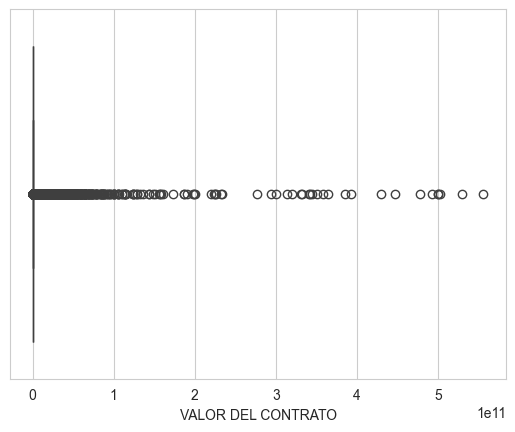

In [ ]:
plot= sns.set_style("whitegrid")
ax=sns.boxplot(x=df_s2['VALOR DEL CONTRATO'])
plot

Identificamos una concentración mayoritariamente entre 0 y 100 mil millones de pesos para el valor de los contratos, debemos verificar los valores que no estén dentro de este rango para cerciorarnos que las cifras no presentan inconsistencias

In [ ]:
df_s2_out=df_s2[df_s2['VALOR DEL CONTRATO']>=100000000000]

df_s2_out.shape

(68, 74)

Vemos que existen 64 contratos que podrían considerarse como con valores de contrato atípicos, por lo cual se deben verificar directamente de la fuente de datos

In [ ]:
df_s2['URLPROCESO']

0          https://community.secop.gov.co/Public/Tenderin...
1          https://community.secop.gov.co/Public/Tenderin...
2          https://community.secop.gov.co/Public/Tenderin...
3          https://community.secop.gov.co/Public/Tenderin...
4          https://community.secop.gov.co/Public/Tenderin...
                                 ...                        
1173477    https://community.secop.gov.co/Public/Tenderin...
1173478    https://community.secop.gov.co/Public/Tenderin...
1173479    https://community.secop.gov.co/Public/Tenderin...
1173481    https://community.secop.gov.co/Public/Tenderin...
1173484    https://community.secop.gov.co/Public/Tenderin...
Name: URLPROCESO, Length: 790008, dtype: object

Una vez verificados se continúa con el análisis.

Ahora seleccionaremos las columnas que se van a integrar con las demás bases de datos

In [ ]:
df_s2_integrar=df_s2[['NOMBRE ENTIDAD', 'CIUDAD', 'ESTADO CONTRATO','PROCESO DE COMPRA','NUMERO DE CONTRATO UNICO','REFERENCIA DEL CONTRATO', 'DESCRIPCION DEL PROCESO', 'FECHA DE FIRMA', 'DOCUMENTO PROVEEDOR', 'PROVEEDOR ADJUDICADO', 'VALOR DEL CONTRATO','MODALIDAD GENERAL','TIPO DE CONTRATO','URLPROCESO']]


- Portal de datos abiertos, conjunto de datos Tienda Virtual del Estado Colombiano – TVEC

Se abre un archivo csv llamado Data_analytics_TVEC.csv con la información de las órdenes de compra colocadas desde el 1° de enero de 2023 a la fecha. 

In [ ]:
tvec_inicial=pd.read_csv('C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\Data_analytics_TVEC.csv')

cols=list(tvec_inicial.columns)
cols=[x.upper().strip() for x in cols]
tvec_inicial.columns=cols

print(cols)

tvec_inicial.shape

C:\Windows\Temp\ipykernel_16428\1916459711.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  tvec_inicial=pd.read_csv('C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\Data_analytics_TVEC.csv')


['AÑO', 'IDENTIFICADOR DE LA ORDEN', 'AGREGACION', 'RAMA DE LA ENTIDAD', 'SECTOR DE LA ENTIDAD', 'ENTIDAD', 'ORDEN DE LA ENTIDAD', 'NIT ENTIDAD', 'SOLICITANTE', 'FECHA', 'PROVEEDOR', 'ESTADO', 'SOLICITUD', 'ITEMS', 'TOTAL', 'CIUDAD', 'ENTIDAD OBIGADA', 'ESPOSTCONFLICTO', 'NIT PROVEEDOR', 'ACTIVIDAD ECONOMICA PROVEEDOR', 'ID ENTIDAD']


(1008831, 21)

In [ ]:
tvec=tvec_inicial

Para esta base de datos, a diferencia de las otras, los contratos se identifican como número de orden de compra, por lo cual siempre serán valores distintos para cada contrato, independientemente de la entidad estatal. Por lo cual se hará la verificación de los duplicados de manera directa con la columna "IDENTIFICADOR DE LA ORDEN". 

Hay que tener presente que la totalidad de las filas que registran en esta base de datos se ve alterada ya que cada item que se registra en una orden de compra se crea una nueva fila, por lo cual vamos a ver que reduce considerablemente el número de órdenes de compra de la base de datos con la eliminación de duplicados.

In [ ]:
print(f"Tamaño del set antes de eliminar las OC Repetidas: {tvec.shape} ")
tvec.drop_duplicates(subset='IDENTIFICADOR DE LA ORDEN', keep="first", inplace=True)
print(f"Tamaño del set después de eliminar las OC Repetidas: {tvec.shape}")

Tamaño del set antes de eliminar las OC Repetidas: (1008831, 21) 
Tamaño del set después de eliminar las OC Repetidas: (21482, 21)


Ahora se verifican las fechas de firma de la orden de compra, unificado con las demás bases de datos

In [ ]:
print(f'Formato de fecha de firma del contrato inicial: {tvec['FECHA'].dtype}')
tvec['FECHA'] = pd.to_datetime(tvec['FECHA'])
print(f'Formato de fecha de firma del contrato después del cambio de formato: {tvec['FECHA'].dtype}')


Formato de fecha de firma del contrato inicial: object
Formato de fecha de firma del contrato después del cambio de formato: datetime64[ns]


Sólo para esta base de datos se verificarán los valores atípicos, ya que 

In [ ]:
tvec['TOTAL'] = pd.to_numeric(tvec['TOTAL'], errors='coerce')

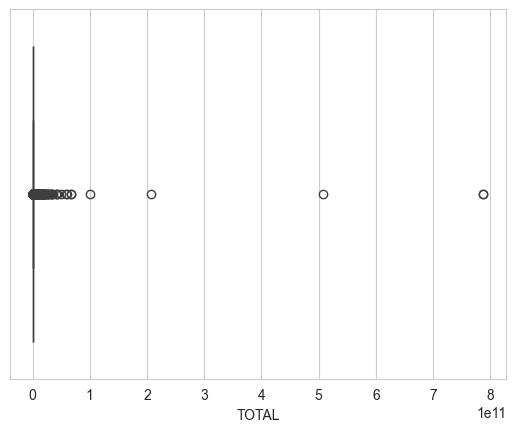

In [ ]:
plot= sns.set_style("whitegrid")
ax=sns.boxplot(x=tvec['TOTAL'])
plot

Se identifica entonces, al igual que en las demás bases de datos que hay valores atípicos desde los 100 mil millones de pesos, los cuales se deben revisar directamente en la fuente de datos

Este conjunto de datos no tiene enlace de la orden de compra, por lo cual se debe crearlo, se identifica que el enlace principal para la consulta de las órdenes de compra es siempre este

https://www.colombiacompra.gov.co/tienda-virtual-del-estado-colombiano/ordenes-compra

Por lo cual se concatenará el enlace con el número de la orden de compra, para esto crearemos primero la columna 'ENLACE'

In [ ]:
tvec['ENLACE']="https://www.colombiacompra.gov.co/tienda-virtual-del-estado-colombiano/ordenes-compra/"

Ahora concatenamos esta nueva columna con el identificador de la orden y creamos el 'ENLACE DE OC'

In [ ]:
tvec['IDENTIFICADOR DE LA ORDEN']=tvec['IDENTIFICADOR DE LA ORDEN'].astype(str)

tvec['ENLACE DE OC'] = tvec['ENLACE'] + tvec['IDENTIFICADOR DE LA ORDEN']

In [ ]:
tvec['ENLACE DE OC']

0          https://www.colombiacompra.gov.co/tienda-virtu...
1          https://www.colombiacompra.gov.co/tienda-virtu...
155        https://www.colombiacompra.gov.co/tienda-virtu...
156        https://www.colombiacompra.gov.co/tienda-virtu...
157        https://www.colombiacompra.gov.co/tienda-virtu...
                                 ...                        
1008656    https://www.colombiacompra.gov.co/tienda-virtu...
1008657    https://www.colombiacompra.gov.co/tienda-virtu...
1008658    https://www.colombiacompra.gov.co/tienda-virtu...
1008659    https://www.colombiacompra.gov.co/tienda-virtu...
1008830    https://www.colombiacompra.gov.co/tienda-virtu...
Name: ENLACE DE OC, Length: 21482, dtype: object

Finalmente identificamos las columnas que se usarán para el análisis de los datos

En esta base de datos no existen las columnas modalidad de contratación ni tipo de contrato, por lo cual vamos a crear unas que digan 'AMP - Orden de compra'

In [ ]:
tvec['MODALIDAD']='AMP - Orden de compra'
tvec['TIPO DE CONTRATO']='AMP - Orden de compra'

In [ ]:

tvec_integrar=tvec[['ENTIDAD','CIUDAD', 'ESTADO', 'AGREGACION','IDENTIFICADOR DE LA ORDEN','IDENTIFICADOR DE LA ORDEN', 'ITEMS','FECHA', 'NIT PROVEEDOR', 'PROVEEDOR', 'TOTAL', 'MODALIDAD','TIPO DE CONTRATO','ENLACE DE OC']]

Una vez definidas estas columnas ahora vamos a integrar las tres bases de datos en una única llamada INTEGRADO

In [ ]:
columnas=df_s2_integrar.columns
df_s1_integrar.columns=columnas
tvec_integrar.columns=columnas


INTEGRADO = pd.concat([df_s1_integrar, df_s2_integrar,tvec_integrar])

In [ ]:
INTEGRADO.shape

(1146695, 14)

Finalmente, tenemos una base de datos con 1'146.695 filas y 14 columnas, vamos a incluir una adicional que me identifique la fuente de datos, para esto tomaremos las cadenas de texto de los enlaces de los contratos

In [ ]:
INTEGRADO['PLATAFORMA'] = 'Otro'
INTEGRADO.loc[INTEGRADO['URLPROCESO'].str.startswith('https://www.contratos.gov.co/'), 'PLATAFORMA'] = 'SECOP I'
INTEGRADO.loc[INTEGRADO['URLPROCESO'].str.startswith('https://community.secop.gov.co/'), 'PLATAFORMA'] = 'SECOP II'
INTEGRADO.loc[INTEGRADO['URLPROCESO'].str.startswith('https://www.colombiacompra.gov.co/tienda'), 'PLATAFORMA'] = 'TVEC'

INTEGRADO.head(10)

,NOMBRE ENTIDAD,CIUDAD,ESTADO CONTRATO,PROCESO DE COMPRA,NUMERO DE CONTRATO UNICO,REFERENCIA DEL CONTRATO,DESCRIPCION DEL PROCESO,FECHA DE FIRMA,DOCUMENTO PROVEEDOR,PROVEEDOR ADJUDICADO,VALOR DEL CONTRATO,MODALIDAD GENERAL,TIPO DE CONTRATO,URLPROCESO,PLATAFORMA
0,GUAVIARE ESE HOSPITAL SAN JOSE DEL GUAVIARE,San José del Guaviare,Liquidado,162-2023,GUAVIARE ESE HOSPITAL SAN JOSE DEL GUAVIARE16...,1622023,PRESTACION DE SERVICIOS COMO AUXILIAR DE ENFER...,2023-01-01,1120582153,FRANKLIN MARROQUIN TRIANA,10926000.0,Contratos y convenios con más de dos partes,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
1,RISARALDA ESE HOSPITAL CRISTO REY BALBOA,Balboa,Celebrado,CONTRATO 008,RISARALDA ESE HOSPITAL CRISTO REY BALBOACONT...,CONTRATO 008,PRESTACION DE SERVICIOS DE APOYO A LA GESTION ...,2023-01-01,4380862,ALEXANDER LOPEZ LONDOÑO,8260000.0,Contratos y convenios con más de dos partes,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
2,VALLE DEL CAUCA ESE HOSPITAL FRANCINETH SANCH...,Vijes,Liquidado,CP-032-2023,VALLE DEL CAUCA ESE HOSPITAL FRANCINETH SANCH...,CP0322023,PRESTACION DE SERVICIOS MOTORISTA,2023-01-01,94362541,EDUARDO PUMALPA,7000000.0,Contratos y convenios con más de dos partes,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
3,GUAVIARE ESE HOSPITAL SAN JOSE DEL GUAVIARE,San José del Guaviare,Liquidado,263-2023,GUAVIARE ESE HOSPITAL SAN JOSE DEL GUAVIARE26...,2632023,PRESTACION DE SERVICIOS COMO AUXILIAR DE LABOR...,2023-01-01,1010049957,PAULA ANDREA SUPELANO JIMENEZ,10926000.0,Contratos y convenios con más de dos partes,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
4,ANTIOQUIA ESE HOSPITAL ATRATO MEDIO ANTIOQUEN...,Vigía del Fuerte,Celebrado,006-2023,ANTIOQUIA ESE HOSPITAL ATRATO MEDIO ANTIOQUEN...,0062023,LA PRESTACION DE SERVICIOS COMO AUXILIAR DE SE...,2023-01-01,32195644,MARTINA MENA GAMBOA,14431584.0,Contratación Directa,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
5,HUILA ESE HOSPITAL SAN FRANCISCO JAVIER ACEVEDO,Acevedo,Celebrado,CS-046,HUILA ESE HOSPITAL SAN FRANCISCO JAVIER ACEV...,CS046,PRESTACION DE SERVICIOS COMO APOYO A LA GESTIO...,2023-01-01,1007695643,ADALID CHAVARRO CALDERON,4410000.0,Régimen Especial,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
6,CUNDINAMARCA ALCALDIA MUNICIPIO DE NILO,Nilo,Liquidado,003-2023,CUNDINAMARCA ALCALDIA MUNICIPIO DE NILO003202...,0032023 PRES,PRESTACION DE SERVICIOS PROFESIONALES PARA DES...,2023-01-01,66978106,SANDRA MILENA HERNANDEZ SIERRA,63600000.0,Contratación Directa,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
7,TOLIMA PIJAOS SALUD EPSI IBAGUE,Ibagué,Celebrado,73-483-23-037,TOLIMA PIJAOS SALUD EPSI IBAGUE7348323037,7348323037,EL PRESENTE CONTRATO TIENE POR OBJETO CONTRATA...,2023-01-01,809009550,THE WALA IPS INDIGENA PUBLICA,854970068.0,Selección Abreviada,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
8,RISARALDA ESE HOSPITAL CRISTO REY BALBOA,Balboa,Celebrado,CONTRATO 004,RISARALDA ESE HOSPITAL CRISTO REY BALBOACONT...,CONTRATO 004,PRESTAR EL SERVICIO DE ENFERMERIA EN LAS AREAS...,2023-01-01,1004682760,BRENDA YULISA CARDENAS SUAREZ,13440000.0,Contratos y convenios con más de dos partes,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I
9,GUAVIARE ESE HOSPITAL SAN JOSE DEL GUAVIARE,San José del Guaviare,Celebrado,058-2023,GUAVIARE ESE HOSPITAL SAN JOSE DEL GUAVIARE05...,0582023,PRESTACION DE SERVICIOS COMO AUXILIAR ADMINIST...,2023-01-01,1006723486,DARIANY PATIÑO ARBOLEDA,5013000.0,Contratos y convenios con más de dos partes,Prestación de Servicios,https://www.contratos.gov.co/consultas/detalle...,SECOP I


In [ ]:
csv_file_path = 'C:\\Users\\danie\\OneDrive\\Escritorio\\Proyecto análisis de datos\\INTEGRADO.csv'

INTEGRADO.to_csv(csv_file_path)

Ya hemos generado el archivo csv en la carpeta, ahora procedemos a analizar y dar respuesta a nuestro ejercicio a través de Power Bi